In [121]:
%%HTML
<style>
   div#notebook-container    { width: 95%; }
   div#menubar-container     { width: 65%; }
   div#maintoolbar-container { width: 99%; }
</style>

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
pd.set_option('max_columns',200)

In [3]:
# ########################### Load Data
# #################################################################################
# print('Load Main Data')
# BASE     = '../cache/ori_grid_part_1.pkl'
# PRICE    = '../cache/ori_grid_part_2.pkl'
# CALENDAR = '../cache/ori_grid_part_3.pkl'

# # Read and contact basic feature
# grid_df = pd.concat([pd.read_pickle(BASE),
#                 pd.read_pickle(PRICE).iloc[:,2:],
#                 pd.read_pickle(CALENDAR).iloc[:,2:]],
#                 axis=1)


# grid_df = grid_df[grid_df['store_id'].isin(['CA_3','WI_1'])]

In [4]:
# Read data
def get_ori_data():
    
    # Read and contact basic feature
    df = pd.concat([pd.read_pickle('../cache/ori_grid_part_1.pkl'),
                    pd.read_pickle('../cache/ori_grid_part_2.pkl').iloc[:,2:],
                    pd.read_pickle('../cache/ori_grid_part_3.pkl').iloc[:,2:]],
                    axis=1)
    
    df2 = pd.read_pickle('../cache/ori_mean_encoding_df.pkl')[['enc_cat_id_mean','enc_cat_id_std',
                   'enc_dept_id_mean','enc_dept_id_std',
                   'enc_item_id_mean','enc_item_id_std'] ]
    df2 = df2[df2.index.isin(df.index)]
    
    df3 = pd.read_pickle('../cache/ori_lags_df_28.pkl').iloc[:,3:]
    df3 = df3[df3.index.isin(df.index)]
    
    df = pd.concat([df, df2], axis=1)
    del df2 # to not reach memory limit 
    
    df = pd.concat([df, df3], axis=1)
    del df3 # to not reach memory limit 
    
    # Skipping first n rows
    df = df[df['d']>=0].reset_index(drop=True)
    
    return df

In [5]:
grid_df = get_ori_data()
# grid_df = grid_df[grid_df['store_id'].isin(['CA_3','WI_1'])]

In [9]:
grid_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,sell_price,price_max,price_min,price_std,price_mean,price_norm,price_nunique,item_nunique,price_momentum,price_momentum_m,price_momentum_y,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end,enc_cat_id_mean,enc_cat_id_std,enc_dept_id_mean,enc_dept_id_std,enc_item_id_mean,enc_item_id_std,sales_lag_28,sales_lag_29,sales_lag_30,sales_lag_31,sales_lag_32,sales_lag_33,sales_lag_34,sales_lag_35,sales_lag_36,sales_lag_37,sales_lag_38,sales_lag_39,sales_lag_40,sales_lag_41,sales_lag_42,rolling_mean_7,rolling_std_7,rolling_mean_14,rolling_std_14,rolling_mean_30,rolling_std_30,rolling_mean_60,rolling_std_60,rolling_mean_180,rolling_std_180,rolling_mean_tmp_1_7,rolling_mean_tmp_1_14,rolling_mean_tmp_1_30,rolling_mean_tmp_1_60,rolling_mean_tmp_7_7,rolling_mean_tmp_7_14,rolling_mean_tmp_7_30,rolling_mean_tmp_7_60,rolling_mean_tmp_14_7,rolling_mean_tmp_14_14,rolling_mean_tmp_14_30,rolling_mean_tmp_14_60
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,1,12.0,0,0.459961,0.500000,0.419922,0.019760,0.476318,0.919922,4.0,16,NaN,0.968750,0.949219,NaN,NaN,NaN,NaN,0,0,0,29,4,1,0,5,5,1,0.708984,2.259766,0.865234,2.544922,4.695312,7.183594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,1,2.0,0,1.559570,1.769531,1.559570,0.032745,1.764648,0.881348,2.0,9,NaN,0.885742,0.896484,NaN,NaN,NaN,NaN,0,0,0,29,4,1,0,5,5,1,0.708984,2.259766,0.865234,2.544922,0.850098,1.754883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,1,0.0,0,3.169922,3.169922,2.970703,0.046356,2.980469,1.000000,2.0,20,NaN,1.064453,1.043945,NaN,NaN,NaN,NaN,0,0,0,29,4,1,0,5,5,1,0.708984,2.259766,0.865234,2.544922,0.611328,0.863281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,1,0.0,0,5.980469,6.519531,5.980469,0.115967,6.468750,0.916992,3.0,71,NaN,0.921875,0.958984,NaN,NaN,NaN,NaN,0,0,0,29,4,1,0,5,5,1,0.708984,2.259766,0.865234,2.544922,0.384766,0.692871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,1,4.0,0,0.700195,0.720215,0.680176,0.011337,0.706543,0.972168,3.0,16,NaN,0.990234,1.001953,NaN,NaN,NaN,NaN,0,0,0,29,4,1,0,5,5,1,0.708984,2.259766,0.865234,2.544922,4.441406,6.703125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
grid_df.item_id.unique().shape

(3049,)

In [7]:
grid_df.store_id.unique().shape

(10,)

In [8]:
grid_df.dept_id.unique().shape

(7,)

In [ ]:
# Here are reafing all our data 
# without any limitations and dtype modification
# train_df = pd.read_csv('../input/m5-forecasting-accuracy/sales_train_validation.csv')
# prices_df = pd.read_csv('../input/m5-forecasting-accuracy/sell_prices.csv')
calendar_df = pd.read_csv('../input/m5-forecasting-accuracy/calendar.csv')
calendar_df['d'] = calendar_df['d'].apply(lambda x: int(x[2:]))
grid_df = grid_df.merge(calendar_df[['d','wm_yr_wk']], on='d', how='left')
del calendar_df

In [9]:
grid_df['sales_week'] = grid_df.groupby(['id','wm_yr_wk'])['sales'].transform(lambda x : x.sum())

In [12]:
grid_df['sales_week'].isna().astype(int).sum()

0

In [15]:
grid_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,sell_price,...,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end,wm_yr_wk,sales_week
0,HOBBIES_1_008_CA_3_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_3,CA,1,11.0,0,0.459961,...,0,29,4,1,0,5,5,1,11101,160.0
1,HOBBIES_1_009_CA_3_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_3,CA,1,3.0,0,1.559570,...,0,29,4,1,0,5,5,1,11101,10.0
2,HOBBIES_1_010_CA_3_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_3,CA,1,1.0,0,3.169922,...,0,29,4,1,0,5,5,1,11101,4.0
3,HOBBIES_1_012_CA_3_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_3,CA,1,2.0,0,5.980469,...,0,29,4,1,0,5,5,1,11101,14.0
4,HOBBIES_1_015_CA_3_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_3,CA,1,22.0,0,0.700195,...,0,29,4,1,0,5,5,1,11101,55.0


In [74]:
def _make_lag_roll(base_test, target, shift_day, roll_wind, key):
    # target, shift_day, roll_wind = LAG_DAY[0],LAG_DAY[1],LAG_DAY[2]
    lag_df = base_test[['id','d',target]]
    col_name = f'{key}_rolling_{target}_mean_tmp_{shift_day}_{roll_wind}'
    lag_df[col_name] = lag_df.groupby(['id'])[target].transform(lambda x: x.shift(shift_day).rolling(roll_wind).mean())
    return lag_df[[col_name]]



def extract_sliding_shift_features(grid_df, target, key):
    
    old_tmp_cols = [col for col in list(grid_df) if key in col]
    grid_df = grid_df.drop(columns=old_tmp_cols)
    ROLS_SPLIT = []
    for i in [1, 7, 14]:
        for j in [7, 14, 30, 60]:
            ROLS_SPLIT.append([i, j])

    for item in ROLS_SPLIT:
        grid_df_add = _make_lag_roll(grid_df[['id','d',target]], target, item[0], item[1], key)
        grid_df = pd.concat([grid_df,grid_df_add], axis=1)
    for item in ROLS_SPLIT:
        grid_df_add = _make_lag_roll2(grid_df[['id','d',target]], target, item[0], item[1], key)
        grid_df = pd.concat([grid_df,grid_df_add], axis=1)
    return grid_df

In [75]:
IDS = grid_df.id.unique().tolist()

In [224]:
len('_validation')

11

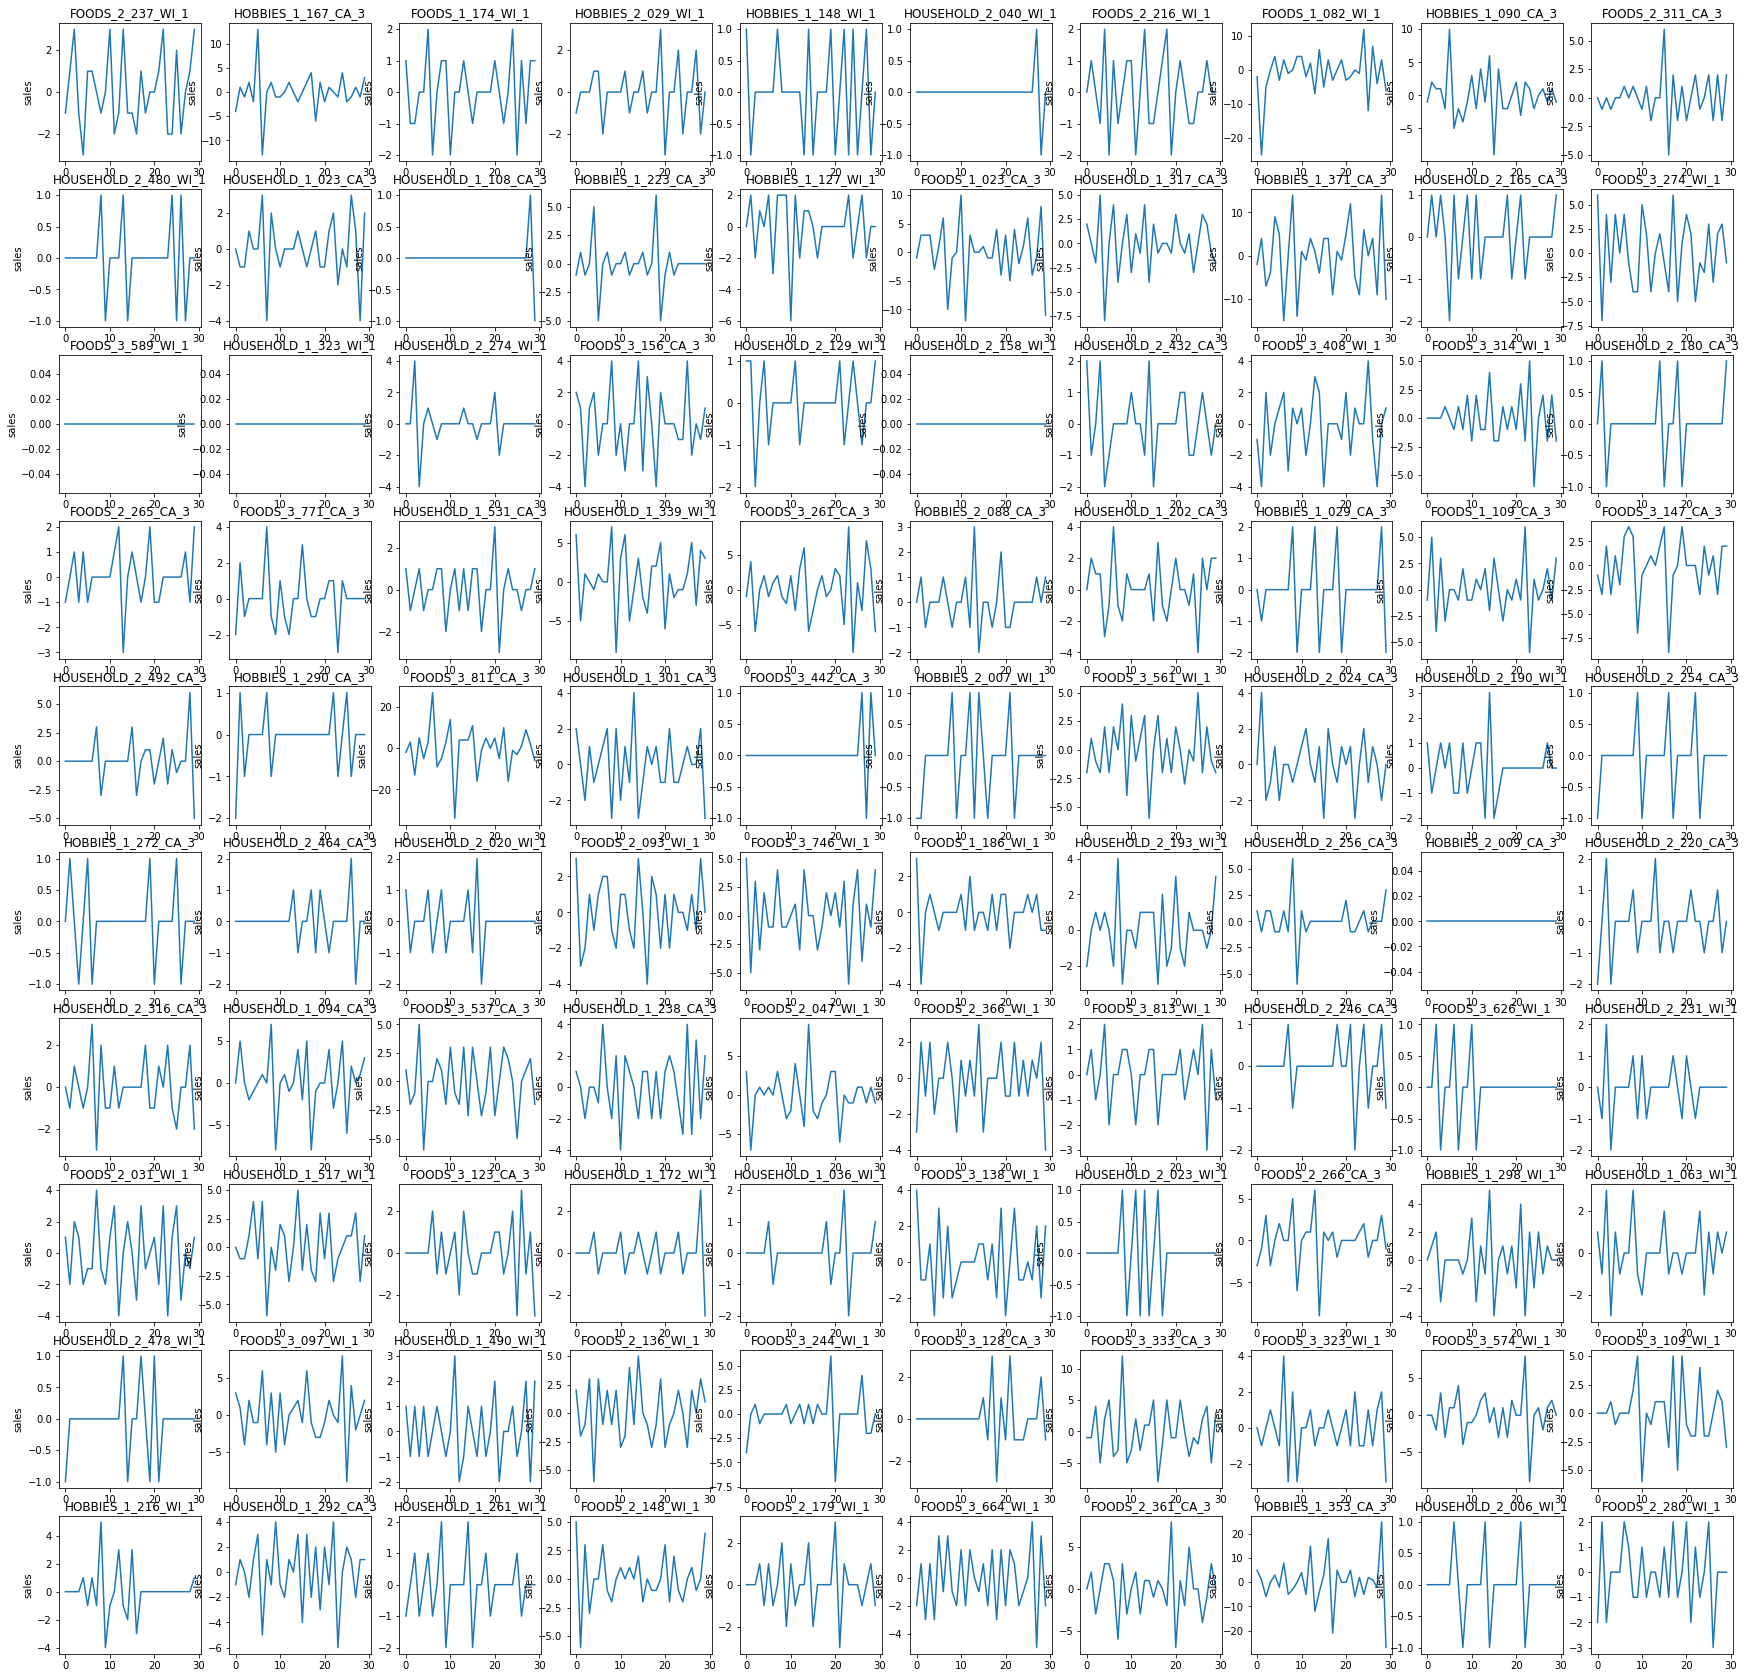

In [225]:
fig, axes = plt.subplots(10,10, figsize=[30,30])
idx = 0
for ax in axes.flat:
    sales = grid_df_samples[grid_df_samples['id']==selected_ids[idx]]['sales'].dropna().diff()[-30:]
    if sales.shape[0]==0:
        print(selected_ids[idx])
        continue
    sns.lineplot(x=np.arange(sales.shape[0]), y=sales, ax=ax)
    ax.set_title(selected_ids[idx][:-11])
    idx +=1

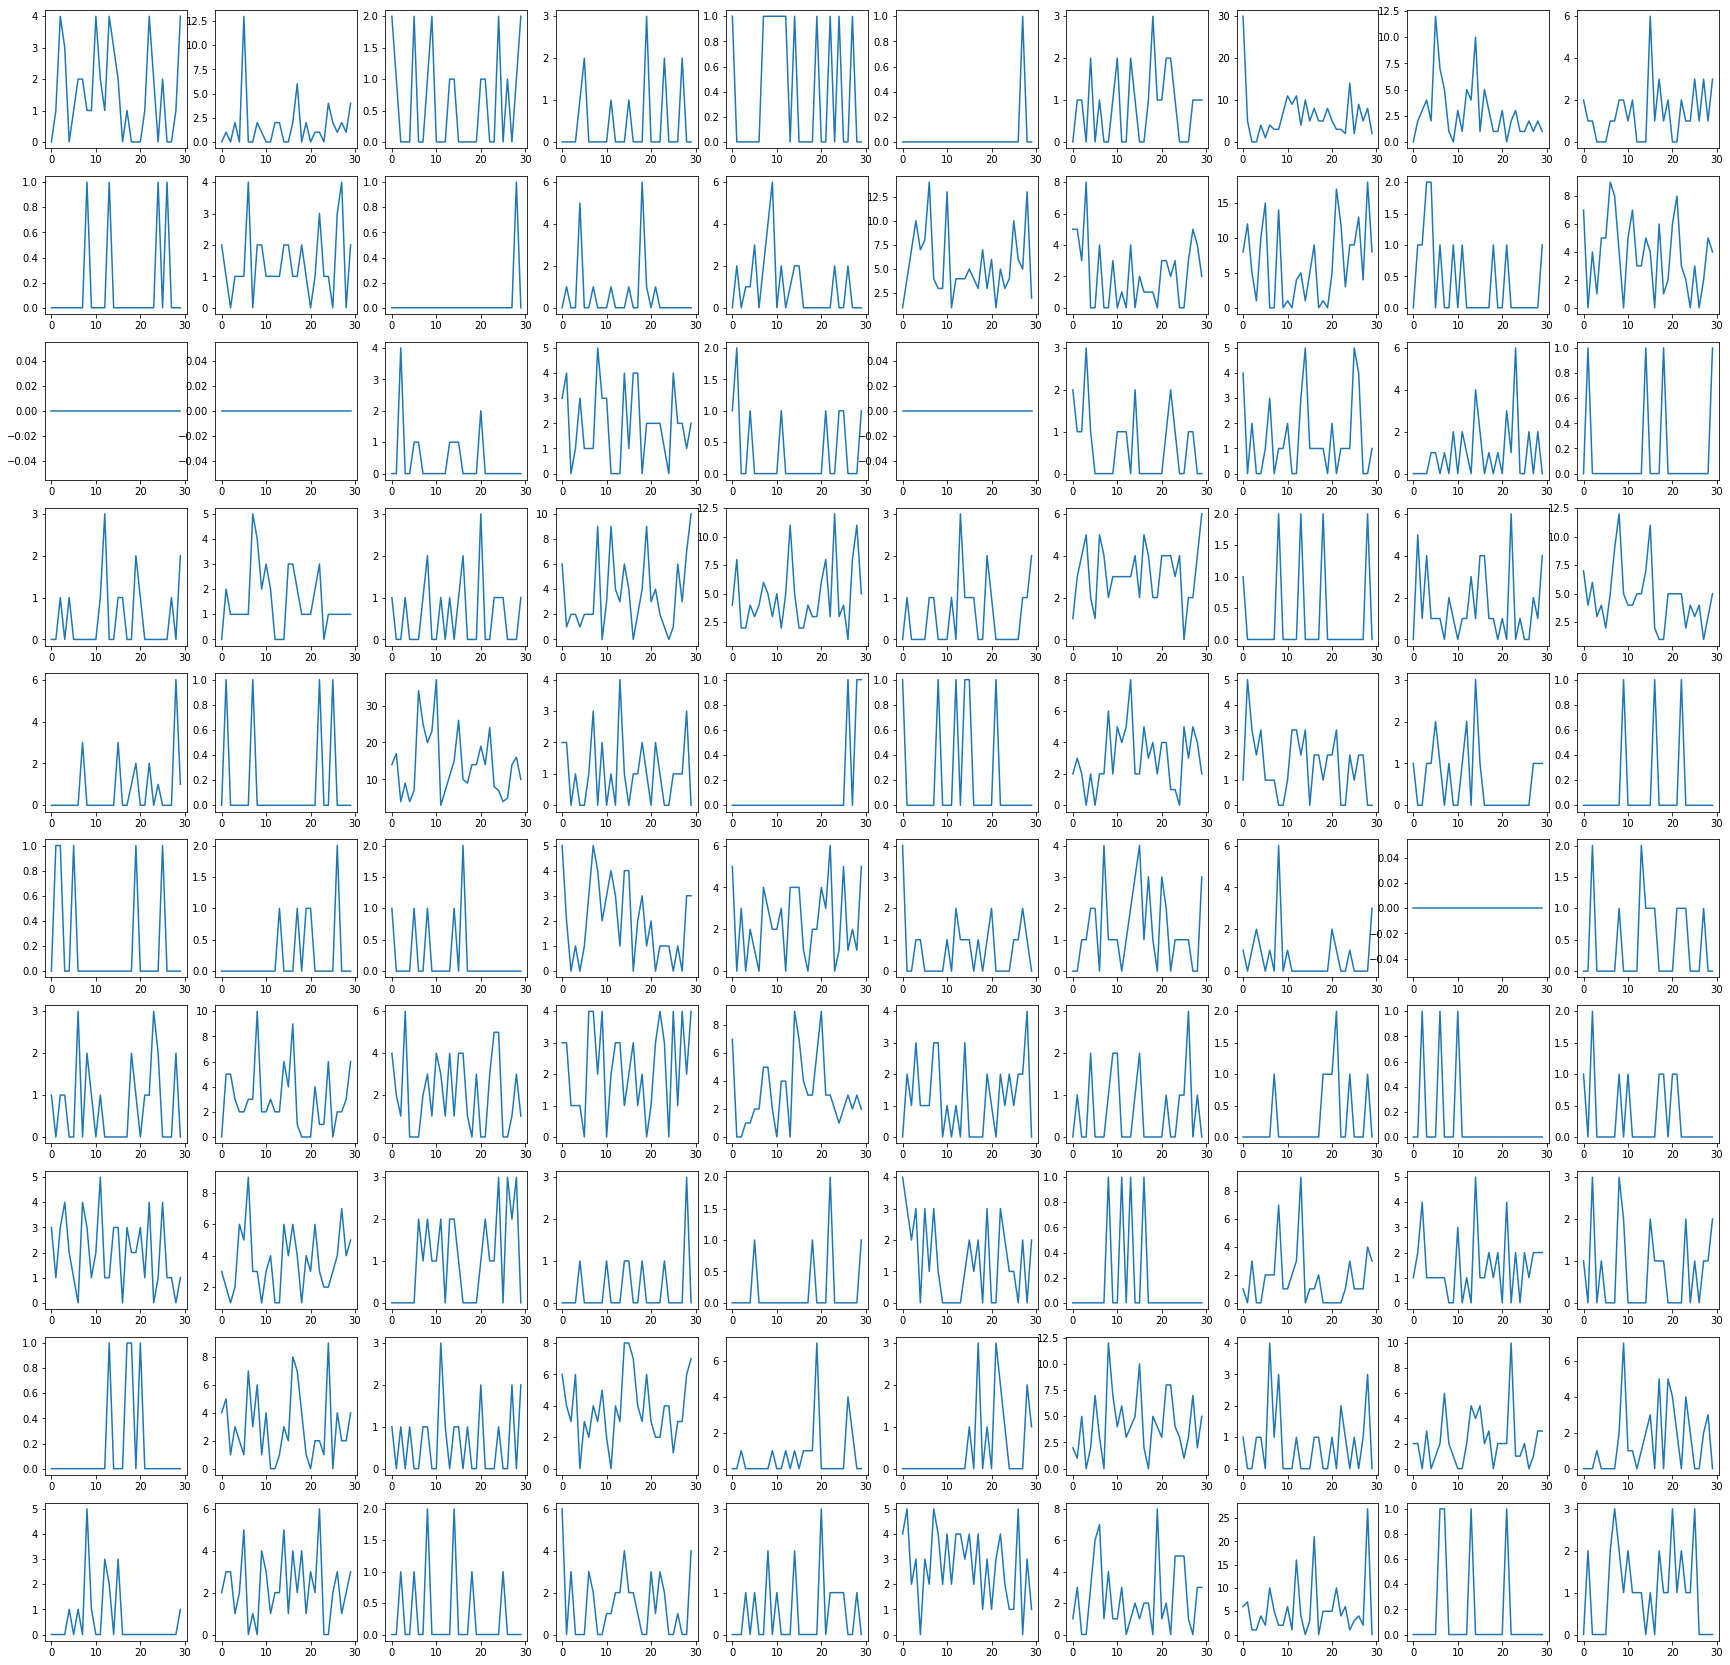

In [220]:
fig, axes = plt.subplots(10,10, figsize=[30,30])
idx = 0
for ax in axes.flat:
    sales = grid_df_samples[grid_df_samples['id']==selected_ids[idx]]['sales'].dropna().values[-30:]
    if sales.shape[0]==0:
        print(selected_ids[idx])
        continue
    sns.lineplot(x=np.arange(sales.shape[0]), y=sales, ax=ax)
    idx +=1

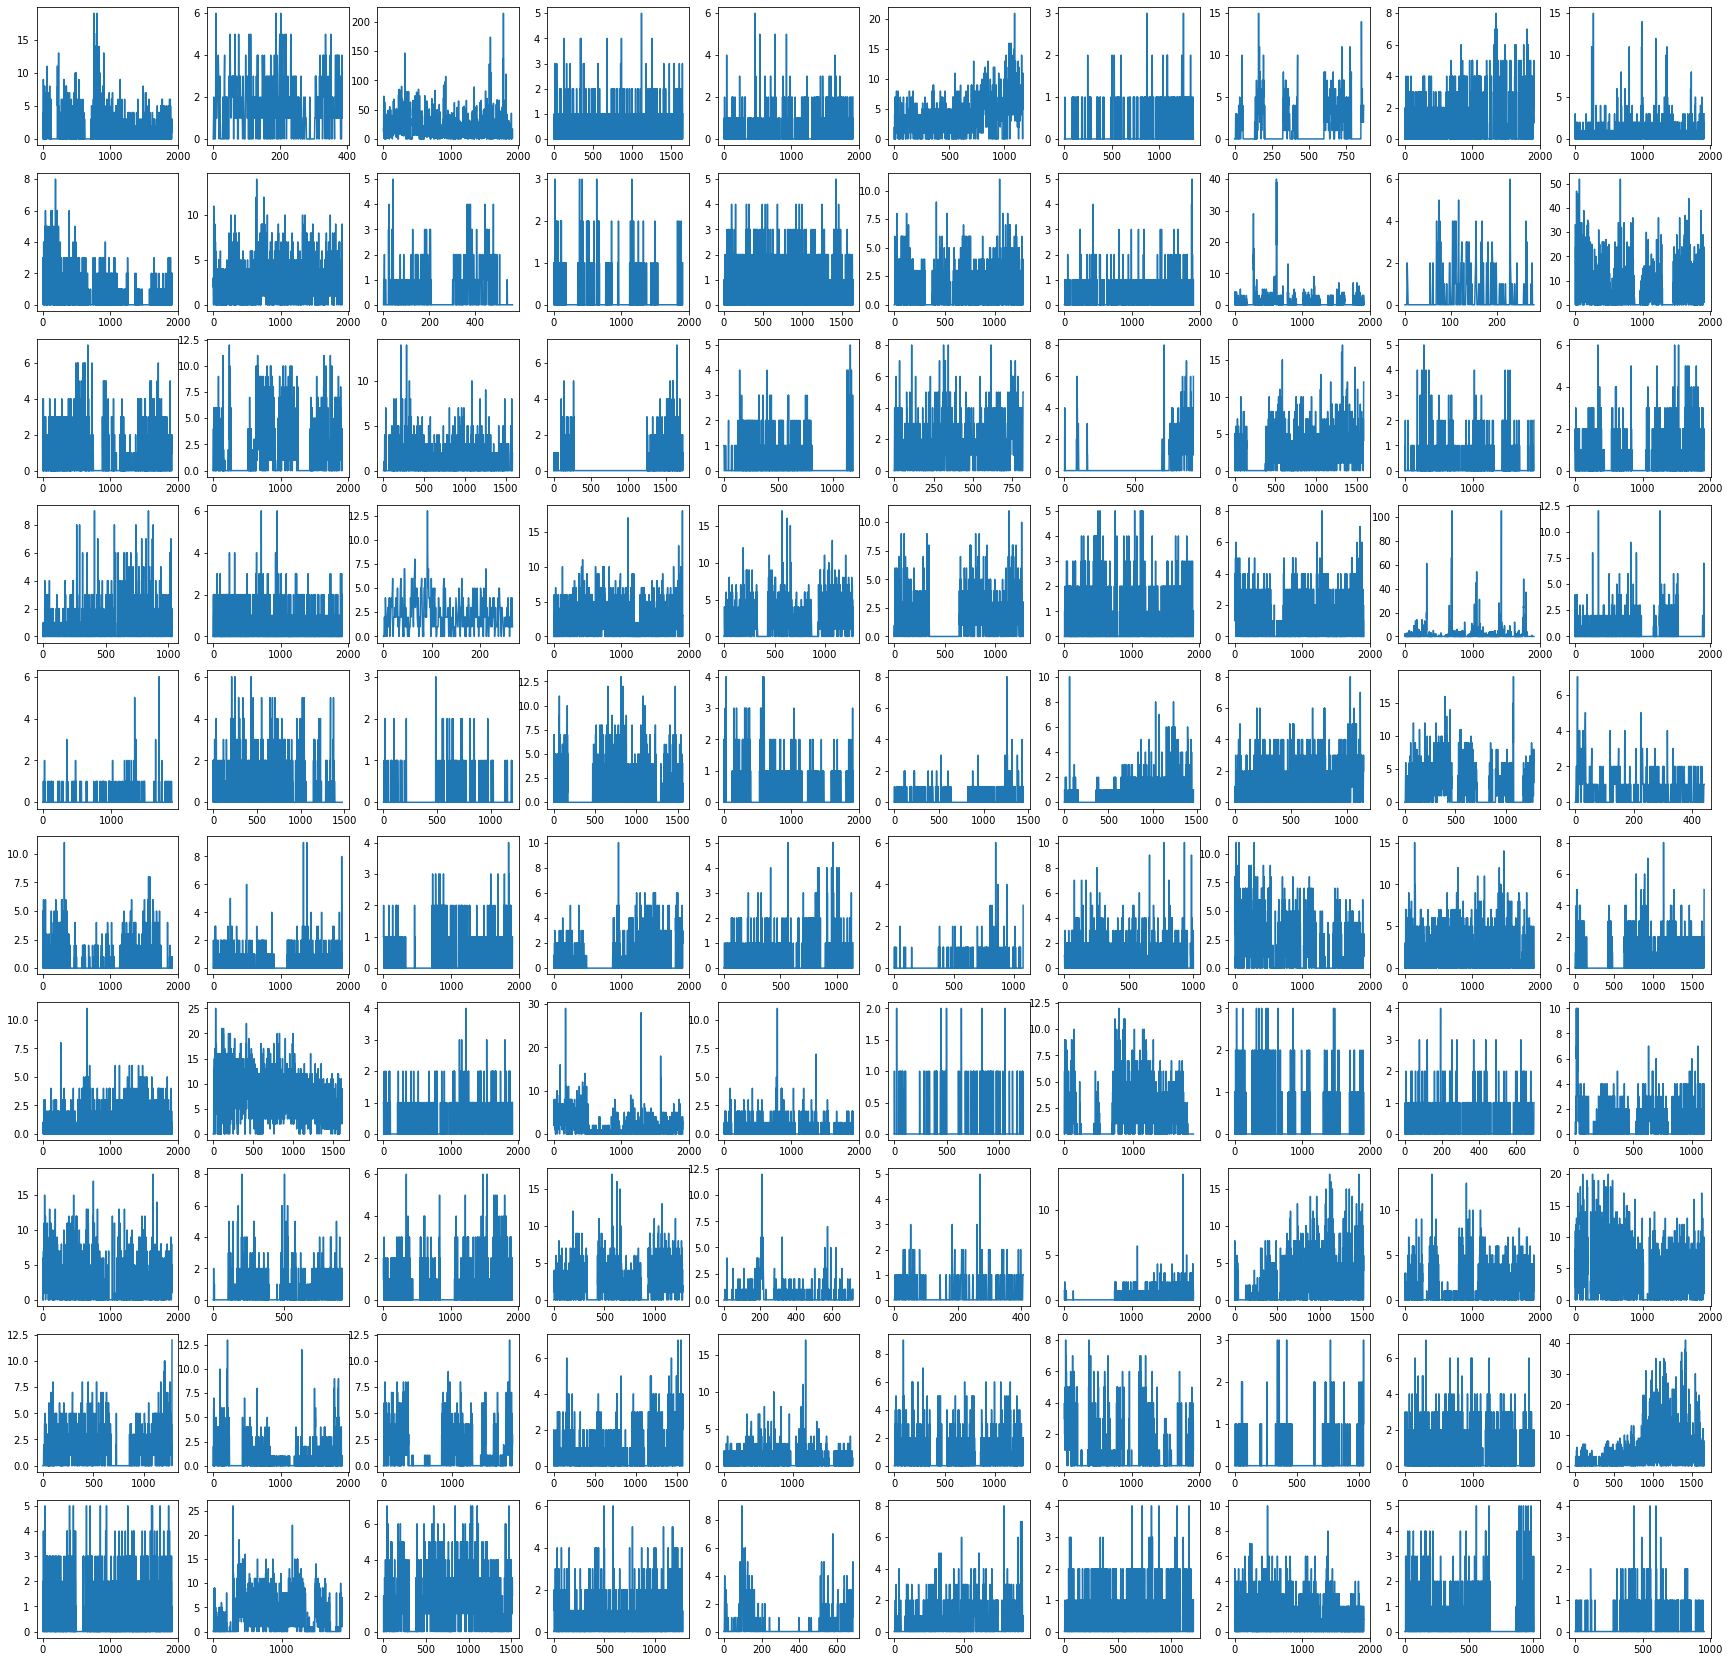

In [122]:
fig, axes = plt.subplots(10,10, figsize=[30,30])
idx = 0
for ax in axes.flat:
    sales = grid_df_samples[grid_df_samples['id']==selected_ids[idx]]['sales'].values
    if sales.shape[0]==0:
        print(selected_ids[idx])
        continue
    sns.lineplot(x=np.arange(sales.shape[0]), y=sales, ax=ax)
    idx +=1

In [137]:
from scipy.stats import linregress

def linregress_slope(x):
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(x.shape[0]), x)
    return slope

def linregress_intercept(x):
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(x.shape[0]), x)
    return intercept

def linregress_r_value(x):
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(x.shape[0]), x)
    return r_value

def linregress_p_value(x):
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(x.shape[0]), x)
    return p_value

def linregress_std_err(x):
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(x.shape[0]), x)
    return std_err

def qutial25(x):
    return np.quantile(x, .25)

def qutial75(x):
    return np.quantile(x, .75)

In [205]:
selected_ids = random.choices(IDS, k=100)
grid_df_samples = grid_df[grid_df['id'].isin(selected_ids)]

# mapping_category = {}
# category_columns = []
# for col in grid_df_samples.columns:
#     if col == 'id':
#         continue
#     if str(grid_df_samples[col].dtype) == 'category':
#         category_columns.append(col)
#         mapping_category[col] =dict(zip(grid_df_samples[col].unique().tolist(), np.arange(grid_df_samples[col].unique().shape[0])))
# grid_df_samples = grid_df_samples.replace(mapping_category)


In [206]:
#start

In [207]:
# grid_df_samples['sales_diff'] =  grid_df_samples.groupby('id')['sales'].transform(lambda x: x.diff())

In [208]:
# slope

In [209]:
# %%time
# ROLS_SPLIT = []
# for i in [1, 7, 14]:
#     for j in [7, 14, 30, 60]:
#         ROLS_SPLIT.append([i, j])
        
# def _make_lag_roll2(base_test, target, shift_day, roll_wind, func):
#     # target, shift_day, roll_wind = LAG_DAY[0],LAG_DAY[1],LAG_DAY[2]
#     lag_df = base_test[['id','d',target]]
#     col_name = f'shift_{shift_day}_rolling{roll_wind}_{target}_{func.__name__}'
#     lag_df[col_name] = lag_df.groupby(['id'])[target].transform(lambda x: x.shift(shift_day).rolling(roll_wind).apply(lambda x: func(x)))
#     return lag_df[[col_name]]

# for item in ROLS_SPLIT:
#     grid_df_add = _make_lag_roll2(grid_df_samples[['id','d','sales']], 'sales', item[0], item[1], qutial25)
#     grid_df_samples = pd.concat([grid_df_samples,grid_df_add], axis=1)
    
# # for item in ROLS_SPLIT:
# #     grid_df_add = _make_lag_roll2(grid_df_samples[['id','d','sales']], 'sales', item[0], item[1], qutial75)
# #     grid_df_samples = pd.concat([grid_df_samples,grid_df_add], axis=1)

In [210]:
%%time
ROLS_SPLIT = []
for i in [1]:
    for j in [7, 14, 21, 28]:
        ROLS_SPLIT.append([i, j])
        
def _make_lag_roll3(base_test, target, shift_day, roll_wind):
    # target, shift_day, roll_wind = LAG_DAY[0],LAG_DAY[1],LAG_DAY[2]
    lag_df = base_test[['id','d',target]]
    col_name = f'shift_{shift_day}_rolling{roll_wind}_{target}_max'
    lag_df[col_name] = lag_df.groupby(['id'])[target].transform(lambda x: x.shift(shift_day).rolling(roll_wind).max())
    return lag_df[[col_name]]

for item in ROLS_SPLIT:
    grid_df_add = _make_lag_roll3(grid_df_samples[['id','d','sales']], 'sales', item[0], item[1])
    grid_df_samples = pd.concat([grid_df_samples,grid_df_add], axis=1)

Wall time: 53.3 s


In [211]:
#end

In [212]:
for i in range(1,29):
    grid_df_samples[f'f{i}_sales'] = grid_df_samples.groupby('id')['sales'].apply(lambda x: x.shift(-i))

In [213]:
value_columns = []
for col in grid_df_samples.columns:
    if str(grid_df_samples[col].dtype) != 'category':
        value_columns.append(col)

In [214]:
from sklearn.preprocessing import StandardScaler
grid_df_samples_corr = pd.DataFrame(StandardScaler().fit_transform(grid_df_samples[value_columns].values), columns=value_columns).corr()

In [215]:
grid_df_samples_corr[abs(grid_df_samples_corr)>.6].loc[[f'f{i}_sales' for i in range(1,29)], ]
# grid_df_samples_corr[abs(grid_df_samples_corr)>.6].loc[['sales']]

,d,sales,release,sell_price,price_max,price_min,price_std,price_mean,price_norm,price_nunique,item_nunique,price_momentum,price_momentum_m,price_momentum_y,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end,enc_cat_id_mean,enc_cat_id_std,enc_dept_id_mean,enc_dept_id_std,enc_item_id_mean,enc_item_id_std,sales_lag_28,sales_lag_29,sales_lag_30,sales_lag_31,sales_lag_32,sales_lag_33,sales_lag_34,sales_lag_35,sales_lag_36,sales_lag_37,sales_lag_38,sales_lag_39,sales_lag_40,sales_lag_41,sales_lag_42,rolling_mean_7,rolling_std_7,rolling_mean_14,rolling_std_14,rolling_mean_30,rolling_std_30,rolling_mean_60,rolling_std_60,rolling_mean_180,rolling_std_180,rolling_mean_tmp_1_7,rolling_mean_tmp_1_14,rolling_mean_tmp_1_30,rolling_mean_tmp_1_60,rolling_mean_tmp_7_7,rolling_mean_tmp_7_14,rolling_mean_tmp_7_30,rolling_mean_tmp_7_60,rolling_mean_tmp_14_7,rolling_mean_tmp_14_14,rolling_mean_tmp_14_30,rolling_mean_tmp_14_60,shift_1_rolling7_sales_max,shift_1_rolling14_sales_max,shift_1_rolling21_sales_max,shift_1_rolling28_sales_max,f1_sales,f2_sales,f3_sales,f4_sales,f5_sales,f6_sales,f7_sales,f8_sales,f9_sales,f10_sales,f11_sales,f12_sales,f13_sales,f14_sales,f15_sales,f16_sales,f17_sales,f18_sales,f19_sales,f20_sales,f21_sales,f22_sales,f23_sales,f24_sales,f25_sales,f26_sales,f27_sales,f28_sales
f1_sales,NaN,0.625207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604970,NaN,0.636093,NaN,0.649495,0.606739,0.651839,0.613171,0.648736,0.615689,0.674607,0.685392,0.684560,0.684430,0.642552,0.657335,0.671597,0.673242,0.615472,0.639872,0.659496,0.664217,0.619997,0.623061,0.621064,0.625253,1.000000,0.625198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f2_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608846,NaN,0.633799,NaN,0.649277,0.607437,0.651171,0.612498,0.648250,0.615388,0.663728,0.678202,0.680224,0.682052,0.637429,0.653783,0.670258,0.671090,0.613893,0.638009,0.657275,0.663112,0.611214,0.617338,0.616824,0.621648,0.625198,1.000000,0.625157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f3_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.612752,NaN,0.631328,NaN,0.648475,0.606365,0.651060,0.611692,0.647701,0.614741,0.656300,0.672762,0.676949,0.680423,0.634367,0.650827,0.669246,0.670016,0.611563,0.636608,0.655693,0.662460,0.605997,0.615040,0.615146,0.619970,NaN,0.625157,1.000000,0.625200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f4_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615774,NaN,0.628634,NaN,0.647699,0.605355,0.650522,0.610781,0.647389,0.614286,0.651448,0.668768,0.674876,0.678937,0.630966,0.648373,0.667750,0.669022,0.610411,0.635699,0.654809,0.661741,0.601850,0.612059,0.613776,0.620592,NaN,NaN,0.625200,1.000000,0.625192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f5_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.617903,NaN,0.626856,NaN,0.647302,0.604731,0.649635,0.609229,0.646893,0.613674,0.647919,0.664506,0.673809,0.677009,0.628311,0.645928,0.666232,0.668044,0.608288,0.634327,0.654813,0.660750,0.600389,0.609557,0.612580,0.620060,NaN,NaN,NaN,0.625192,1.000000,0.625092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f6_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,